# <b>Section 1: Data Exploration</b>

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data exploration:
- `numpy`: used for mathematical operations on matrices
- `pandas`: used to store data from .csv/.tsv files and operate functions on DataFrame
- `matplotlib`: used to visualize data

In [22]:
import sys  
sys.path.insert(0, '../../data')
sys.path.insert(0, '../../data/description')

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

### <b><u>Step 2</u>: Import songs data from 'songs_data.csv' file</b>

First, let's read the Spotify's songs data from `songs_data.tsv` file by using pandas.

In [24]:
songs_df_raw = pd.read_csv('../../data/songs_data.tsv', sep='\t')

### <b><u>Step 3</u>: Remove duplicate rows in the raw data</b>

Next, let's check whether the DataFrame has duplicate rows that needs to be removed.

In [25]:
duplicated_rows = songs_df_raw.duplicated().sum()
print(f'Number of duplicated rows: {duplicated_rows}')

Number of duplicated rows: 0


So there are 0 rows that are duplicated, which means each row in the DataFrame is unique.

But if there are any duplicate rows, we need to drop those 35 rows and see some of the first rows of the dataset.

In [26]:
songs_df = songs_df_raw.drop_duplicates()
songs_df.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
0,1RDvyOk4WtPCtoqciJwVn8,Dreamers [Music from the FIFA World Cup Qatar ...,"Jung Kook,BTS,FIFA Sound","k-pop boy group,k-pop","5382641,58715441,167875","80,92,77",183,Dreamers [Music from the FIFA World Cup Qatar ...,2022-11-20,81,201391,False,92
1,6A1IbMKwjvXibcrU1sdqKH,Em Là,"MONO,Onionn",NaN,"100123,2809","54,55",182,22,2022-08-18,60,197333,False,62
2,7bFFUPBiF15n8m8RziqS4o,dự báo thời tiết hôm nay mưa,GREY D,v-pop,39690,56,182,dự báo thời tiết hôm nay mưa – Maxi Single,2022-11-22,52,281493,False,62
3,4QjxvzEFwb63NZ1pp3wvHy,Chết Trong Em,Thịnh Suy,"vietnamese singer-songwriter,v-pop",359817,54,183,Chết Trong Em,2022-10-31,50,256663,False,62
4,5p8ThxM2OhJ0igfxkz0Z1q,Wild Flower (with youjeen),RM,k-rap,12005881,81,183,Indigo,2022-12-02,85,273499,False,88


### <b><u>Step 4</u>: Explore the dataset</b>

In this next step, we will explore the features of the dataset. First, let's check how many rows and columns in the DataFrame.

In [27]:
num_rows, num_cols = songs_df.shape
print("The number of rows: ", num_rows) 
print("The number of columns: ", num_cols)

The number of rows:  3000
The number of columns:  13


There are 3000 rows and 13 columns in total.

Next, we need to know what are the columns of the DataFrame and check whether we need to remove any of them.

In [28]:
columns = songs_df.columns
columns

Index(['id', 'name', 'artist', 'genres', 'artist_followers',
       'artist_popularity', 'markets', 'album', 'released_date',
       'album_popularity', 'duration', 'explicit', 'popularity'],
      dtype='object')

To discover the meaning of each column, we can load data from `songs_data_des.csv` file

In [121]:
songs_des_df = pd.read_csv('../../data/description/songs_data_des.csv', on_bad_lines='skip')
songs_des_df

,column name,data type,meaning,example
0,id,string,The Spotify ID of track,3nqQXoyQOWXiESFLlDF1hG
1,name,string,The name of the track,Unholy (feat. Kim Petras)
2,artist,string,The artist(s) of the track,Sam Smith.Kim Petras
3,genres,string,The genres of that artist(s),uk pop.transpop.pop.dance pop
4,artist_followers,string,The number of followers of the artist(s),20747240.825245
5,artist_popularity,string,The popularity of the artist(s). The value wi...,87.82
6,markets,int,The number of countries which the track is av...,182
7,album,string,The album of the track,Unholy (feat. Kim Petras)
8,released_date,string,The released date of the track,2022-09-22
9,album_popularity,int,The popularity of the album.,88


- **id**: The Spotify ID of track
- **name**: The name of the track
- **artist**: The artist(s) of the track
- **genres**: The genres of that artist(s)
- **artist_followers**: The number of followers of the artist(s)
- **artist_popularity**: he popularity of the artist(s)
- **markets**: The number of countries which the track is available
- **album**: The album of the track
- **released_date**: The released date of the track
- **album_popularity**: The popularity of the album.
- **duration**: The duration of the track
- **explicit**: Check whether the lyrics of the track is explicit
- **popularity**: The popularity of the track

At the moment, we don't really need to use the feature `explicit` for data exploration. So we will decide to drop it for now.

In [30]:
songs_df.drop('explicit', inplace=True, axis=1, errors='ignore')

Choosing the right data type will make the analysis tasks error-free, easy, choosing the right functions and libraries to handle it.

Before pre-action processing, use the `open_object_dtype(s)` function to get the actual data type the columns contain:

In [31]:
def open_object_dtype(c):
    dtypes = set()
    
    c.apply(lambda x: dtypes.add(type(x)))
    
    return dtypes

Desired data type based on current tuple:

In [32]:
columns = songs_df.columns.to_list() 
for col in columns:
    print(f'{col:<20}', open_object_dtype(songs_df[col]))

id                   {<class 'str'>}
name                 {<class 'str'>}
artist               {<class 'str'>}
genres               {<class 'float'>, <class 'str'>}
artist_followers     {<class 'str'>}
artist_popularity    {<class 'str'>}
markets              {<class 'int'>}
album                {<class 'str'>}
released_date        {<class 'str'>}
album_popularity     {<class 'int'>}
duration             {<class 'int'>}
popularity           {<class 'int'>}


So base on each column's data type(s), we can see that most of the columns have whether int or str type, whereas genres has 2 different data types: float and str, which we can tell from this column that it might have NaN values.

Now, we need to re-check the real data types of each column.

In [33]:
dtypes = songs_df.dtypes
dtypes

id                   object
name                 object
artist               object
genres               object
artist_followers     object
artist_popularity    object
markets               int64
album                object
released_date        object
album_popularity      int64
duration              int64
popularity            int64
dtype: object

As we can see, there are only 4 numeric categories: `markets`, `album_popularity`, `duration` and `popularity`. The rest of the columns are either string or list types but in DataFrame, string and list are categorized as object.

Let's get the detailed info and number of non-null values of each column.

In [34]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3000 non-null   object
 1   name               3000 non-null   object
 2   artist             3000 non-null   object
 3   genres             2811 non-null   object
 4   artist_followers   3000 non-null   object
 5   artist_popularity  3000 non-null   object
 6   markets            3000 non-null   int64 
 7   album              3000 non-null   object
 8   released_date      3000 non-null   object
 9   album_popularity   3000 non-null   int64 
 10  duration           3000 non-null   int64 
 11  popularity         3000 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 304.7+ KB


We can notice that there are some null values in genres column, therefore, we need to explore how many values are missing in each column of the dataset.

In [35]:
songs_df.isnull().sum()

id                     0
name                   0
artist                 0
genres               189
artist_followers       0
artist_popularity      0
markets                0
album                  0
released_date          0
album_popularity       0
duration               0
popularity             0
dtype: int64

So there are 189 missing values in the `genres` column, the other columns in the DataFrame does not have any null values. 

As for now, we will move on to the data preprocessing step to clean and normalize all the data.

### <b><u>Step 6</u>: Preprocessing the dataset</b>

##### Distinguish between numerical and categorical columns
Based on the data, the numeric property has the following columns:
  - `markets`	
  - `album_popularity`	
  - `duration`	
  - `popularity`	
  - `artists_count`

Likewise, the categorical attribute has the following columns:
  - `genres`
  - `artist`
  - `album`

##### Calculate missing ratio, num_diff_vals and diff_vals of numerical and categorical columns

In this part, we need to explore values in categorical columns. 

We build some help functions below to calculate the missing ratio of values in the columns (in percentage), calculate number of different values and the list of different values.

In [36]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def num_diff_vals(c):
    if c.all() == songs_df['genres'].all() or c.all() == songs_df['artist'].all():
        return c.str.split(',').explode().nunique()
    return c.nunique(dropna=True)

def diff_vals(c):
    if c.all() == songs_df['genres'].all() or c.all() == songs_df['artist'].all():
        return c.str.split(',').explode().value_counts().keys().to_list()
    return c.dropna().unique()

def lower_quantile(c):
    return c.describe()['25%']

def upper_quantile(c):
    return c.describe()['75%']

def mean(c):
    return c.mean()

def median(c):
    return c.median()

For categorical columns, we need to specify what is the missing ratio, number of unique values and list all of the unique values. There are 3 categorical columns in the dataset: `genres`, `artist` and `album`.

In [37]:
categorical_cols_des = songs_df[['genres', 'artist', 'album']].agg([missing_ratio, num_diff_vals, diff_vals])
categorical_cols_des

,genres,artist,album
missing_ratio,6.3,0.0,0.0
num_diff_vals,434,1542,2073
diff_vals,"[pop, v-pop, dance pop, vietnamese hip hop, uk...","[Ed Sheeran, Justin Bieber, David Guetta, Tayl...","[Winter Blues 2023, Winter Vibes 2023, Indigo,..."


From the insights, we could see that genres column has a missing ratio of 6.3% in total. Furthermore, there are 434 unique genres in the whole dataset.

Hence, there are 1542 unique artists and 2073 unique albums in total from the DataFrame. These are very important numbers that we can use to analyze.

##### 1. Genres

First we will need to preprocess data in `genres` column since it has null values. Each data in `genres` column is a string of genre(s) seperated by a comma (`,`). 

Therefore, we need to convert the string data into a list of genres, then fill all of the null values with `None`.

In [38]:
songs_df['genres'] = songs_df['genres'].str.split(',')
songs_df['genres'].fillna('None', inplace=True)

Next, we will add another column called `main_genre` to the DataFrame, since we think it might be useful for data modeling.

We take the first genre that appeared in the list to be the main genre.

In [39]:
songs_df['main_genre'] = songs_df['genres'].apply(lambda x: x[0] if type(x) == list else x)

##### 2. Artists

Let's move on to the `artist` column. Each data in this column is also a string of artist(s) separated by a comma. 

So we also need to convert string data into a list.

In [40]:
songs_df['artist'] = songs_df['artist'].str.split(',')

We found it also might be interesting that we add another column called `artists_count` into the DataFrame, it can be used to answer some meaningful questions.

In [41]:
songs_df['artists_count'] = songs_df['artist'].apply(len)

##### 3. Released date

We have a datetime datatype column in the DataFrame, which is the released date of the track. Therefore, we need to convert string data into datetime by using `to_datetime` function in pandas.

In [42]:
songs_df['released_date'] = pd.to_datetime(songs_df['released_date'], format='%Y-%m-%d', errors='coerce')

Now, we would like to explore some numeric stats in this column: mean, min, lower quantile, median, upper quantile, max

In [132]:
songs_df['released_date'].describe(datetime_is_numeric=True).drop('count')

mean    2021-08-25 06:11:31.200000256
min               2020-01-01 00:00:00
25%               2020-10-23 00:00:00
50%               2021-07-16 00:00:00
75%               2022-12-02 00:00:00
max               2022-12-17 00:00:00
Name: released_date, dtype: object

As we can see from the stats above, we know that the oldest song in the data is released on Jan 1, 2020, whereas the latest song is released on Dec 17, 2022.

##### Calculate missing ratio, min and max values of numerical columns

Now we can explore the missing ratio, min and max values in numerical colums.

There are 5 numerical columns in total, including: `markets`, `album_popularity`, `duration`, `popularity` and `artists_count`. Let's explore missing ratio, min value and max value of these columns.

In [127]:
numeric_cols_des = songs_df[songs_df.describe().columns].agg([missing_ratio, min, lower_quantile, mean, median, upper_quantile, max])
numeric_cols_des

,artist_followers,artist_popularity,markets,album_popularity,duration,popularity,artists_count,year,month
missing_ratio,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000
min,9.000000e+00,15.000000,1.000000,0.000000,51913.000000,0.000000,1.000,2020.0,1.000
lower_quantile,1.221705e+05,54.000000,181.000000,14.750000,175238.000000,7.000000,1.000,2020.0,5.000
mean,1.977646e+07,72.570667,165.403333,37.236667,209439.278667,42.386333,1.469,2021.0,8.336
median,1.444366e+06,76.000000,183.000000,37.000000,202197.500000,45.000000,1.000,2021.0,9.000
upper_quantile,2.632649e+07,91.000000,184.000000,59.000000,237533.250000,66.000000,2.000,2022.0,12.000
max,1.240652e+08,100.000000,184.000000,95.000000,613026.000000,100.000000,10.000,2022.0,12.000


There are some noticeable values:
- 1 is the minimum value of markets that a songs is available.
- The shortest song duration is 51913 ms ~ 52 seconds!
- 10 is the maximum value of the number of artists involved in a song!
- The highest album popularity score is 95, whereas highest song popularity score is 100!

<Figure size 300x5000 with 0 Axes>

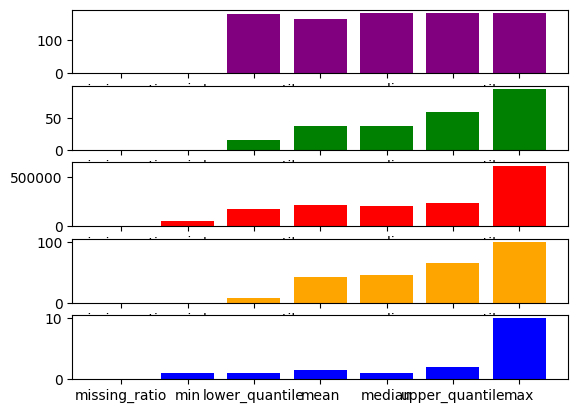

In [116]:
plt.figure(figsize=(3, 50))
_, ax = plt.subplots(5, 1)
ax[0].bar(numeric_cols_des.index, numeric_cols_des['markets'], color = 'purple')
ax[1].bar(numeric_cols_des.index, numeric_cols_des['album_popularity'], color = 'g')
ax[2].bar(numeric_cols_des.index, numeric_cols_des['duration'], color = 'r')
ax[3].bar(numeric_cols_des.index, numeric_cols_des['popularity'], color = 'orange')
ax[4].bar(numeric_cols_des.index, numeric_cols_des['artists_count'], color = 'b');

For easy visualization, let's plot the description table into bar charts.
- `markets`: purple chart
- `album_popularity`: green chart
- `duration`: red chart
- `popularity`: orange chart
- `artists_count`: blue chart

### <b><u>Step 6</u>: Normalizing columns in the dataset</b>

##### 1. Artist followers

Each data in `artist_followers` column is a string of followers of respective artist(s) separated by a comma.

Therefore, we need to convert string data to a list and convert each number of followers from string to int.

In [47]:
songs_df['artist_followers'].update(songs_df['artist_followers'].str.split(','))
songs_df['artist_followers'].update(songs_df['artist_followers'].apply(lambda x: list(map(int, x))))

Next step, since we want to represent the artists' followers as a specific value only, let's normalize the list of followers into 1 number by calculating the vectorized length of the elements in the list.

In [48]:
songs_df['artist_followers'] = songs_df['artist_followers'].apply(lambda x: np.sqrt(np.sum(list(map(lambda y: y**2, x)))))
songs_df['artist_followers'] = songs_df['artist_followers'].astype('int64')

##### 2. Artist popularity

`artist_popularity` column has the same feature as `artist_followers`. So we also need to convert each data from string to list and then map all the values from string to numbers.

In [49]:
songs_df['artist_popularity'].update(songs_df['artist_popularity'].str.split(','))
songs_df['artist_popularity'].update(songs_df['artist_popularity'].apply(lambda x: list(map(int, x))))

Furthermore, we also want to represent the artists' popularity by 1 number only, therefore, let's calculate the vectorized length of each element in the list of each data.

In [50]:
songs_df['artist_popularity'] = songs_df['artist_popularity'].apply(lambda x: min(100, np.sqrt(np.sum(list(map(lambda y: y**2, x))))))
songs_df['artist_popularity'] = songs_df['artist_popularity'].astype('int64')

### <b><u> Step 7</u>: Ask some meaningful questions about the data</b>

##### Question 1: What are the top 10 most popular genres and visualize the number of songs each genre is involved in.

We would like to know what is the top 10 genres that artists usually go for the understand the music trends in 2020-2022.

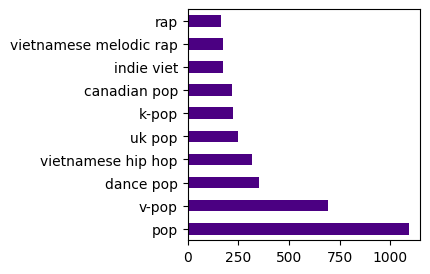

In [111]:
top_10_genres = songs_df['genres'].str.join(',').str.split(',').explode().value_counts().drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top_10_genres.plot.barh(figsize=(3,3), color='indigo');

- From the results above, we can see that pop has always been the most popular genre. 

- There are also some popular pop variants such as v-pop, k-pop, uk pop... (at least in Vietnam market). 

- Vietnamese indie and rap are 2 potential genres.

Now, let's visualize the top 10 genres in pie chart to see the percentage of each top 10 genres has gained.

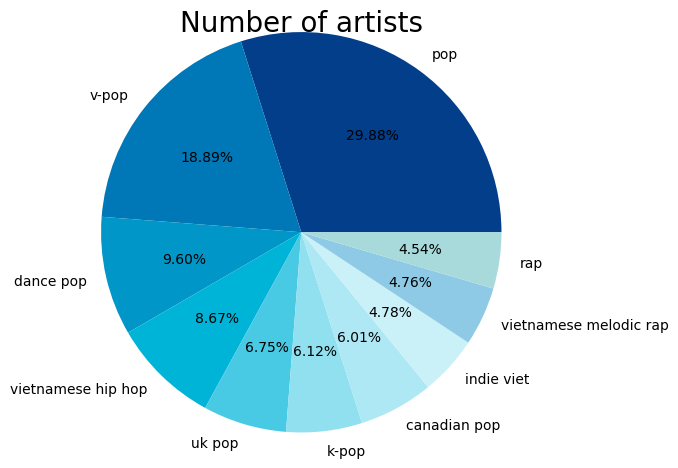

In [91]:
plt.figure(figsize=(8, 5))
plt.title('Number of artists', fontsize=20)
plt.pie(top_10_genres.to_numpy().reshape(-1), 
        labels=[i for i in top_10_genres.keys()],
        textprops={"fontsize":10},
        radius=1.3, startangle=0,
        colors=['#023e8a', '#0077b6', '#0096c7', '#00b4d8', '#48cae4', '#90e0ef', '#ade8f4', '#caf0f8', '#8ecae6', '#a8dadc'],
        autopct='%.02f%%')
plt.show()

From the pie chart, pop has a percentage of almost 30%, and if we combine all the variants of pop genre together, the percentage will be approximately 60% to 70%, and the 2 potential genres, rap and Vietnamese rap, has a total of almost 10%.

##### Question 2: Top 10 artists that has the most songs released in 2020-2022 and visualize the number of songs of each artist.

After knowing the top 10 genres, we would like to know what is the top 10 artists by counting the number of songs that they released in the dataset (from 2020 to 2022). From that, we will know a group of active artists and their contribution is impactful to the music industry.

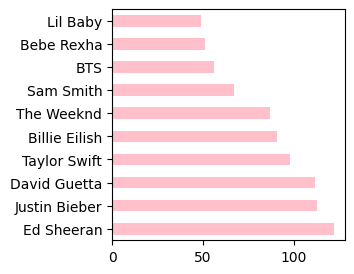

In [110]:
top_10_artists = songs_df['artist'].str.join(',').str.split(',').explode().value_counts().nlargest(n=10)
top_10_artists.plot.barh(figsize=(3,3), color='pink');

Most of the artists in this chart are from us-uk, except for the only asian representative, BTS. These top 10 artists released from at least over 50 songs to over 100 songs each artist, these artists are quite active in song producing.

Now, let's also visualize the top 10 artists with pie chart.

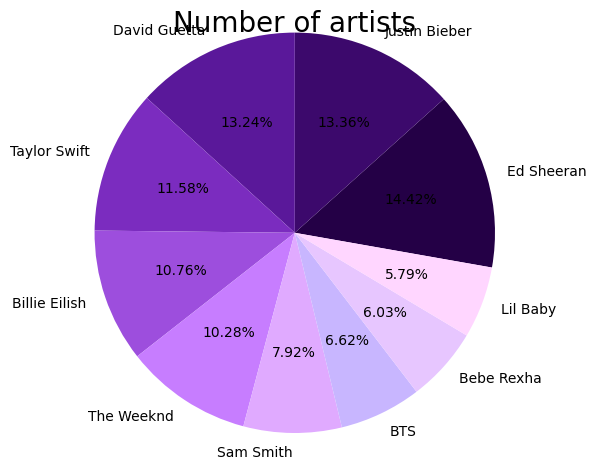

In [135]:
plt.figure(figsize=(8, 5))
plt.title('Number of artists', fontsize=20)
plt.pie(top_10_artists.to_numpy().reshape(-1), 
        labels=[i for i in top_10_artists.keys()],
        textprops={"fontsize":10},
        radius=1.3, startangle=-10,
        colors=['#240046', '#3c096c', '#5a189a', '#7b2cbf', '#9d4edd', '#c77dff', '#e0aaff', '#c8b6ff', '#e7c6ff', '#ffd6ff'],
        autopct='%.02f%%')
plt.show()

From the stats in the pie chart, we can see that Ed Sheeran, Justin Bieber, David Guetta, Taylor Swift and Billie Eilish have always been the top 5 most active artists since their contribution of songs compared to all of the top 10 artists' songs is about 11% to 14% each.

Lil Baby, even though has the least percentage with only 5.79%, but this artist is a very potential one and might be a rising star.

##### Question 3: What are the top 10 most popular albums and visualize the number of songs mentioned in each album.

Finally, we will also find the top 10 albums from the dataset that has the most songs to discover some special features about those albums as well as artists and songs that we just did earlier.

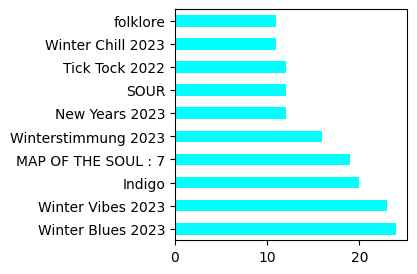

In [109]:
top_10_albums = songs_df['album'].value_counts().nlargest(n=10)
top_10_albums.plot.barh(figsize=(3,3), color='cyan');

At first glance, these 10 albums have at least over 10 songs and at most over 20 songs. Most of the albums have a winter theme since there are 4 albums are about winter, and 5 albums have the year 2023 in it.

Therefore, we discover that the albums that have the most songs in the dataset are about end of year 2022 and new year 2023. 

Now let's also visualize the top 10 albums as a pie chart to compared the percentage between them.

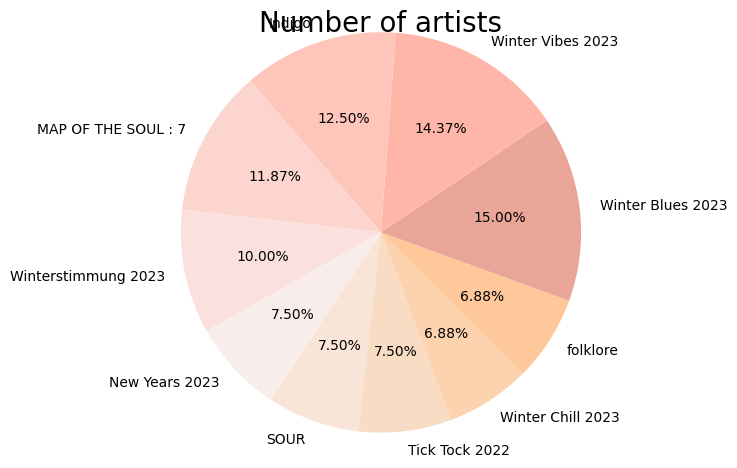

In [120]:
plt.figure(figsize=(8, 5))
plt.title('Number of artists', fontsize=20)
plt.pie(top_10_albums.to_numpy().reshape(-1), 
        labels=[i for i in top_10_albums.keys()],
        textprops={"fontsize":10},
        radius=1.3, startangle=-20,
        colors=['#e8a598', '#ffb5a7', '#fec5bb', '#fcd5ce', '#fae1dd', '#f8edeb', '#f9e5d8', '#f9dcc4', '#fcd2af', '#fec89a'],
        autopct='%.02f%%')
plt.show()

This is a very balance pie chart since there are no significant differences between the percentage. There are 3 albums that have the same percentage of 7.5% and 2 albums that have the same percentage 6.88%, Winter Blues 2023 has the highest percentage with 15%.

Besides that, there are 2 orginal albums from original artists: MAP OF THE SOUL: 7 with 11.87% and SOUR with 7.5%.

##### Question 4: For each song popularity value, visualize the number of songs.

We would like to know for each song's popularity score from 0 to 100, how many songs each score has in order to understand how the songs' popularity in the dataset is spreaded, therefore, we have insights about the current status about the music industry.

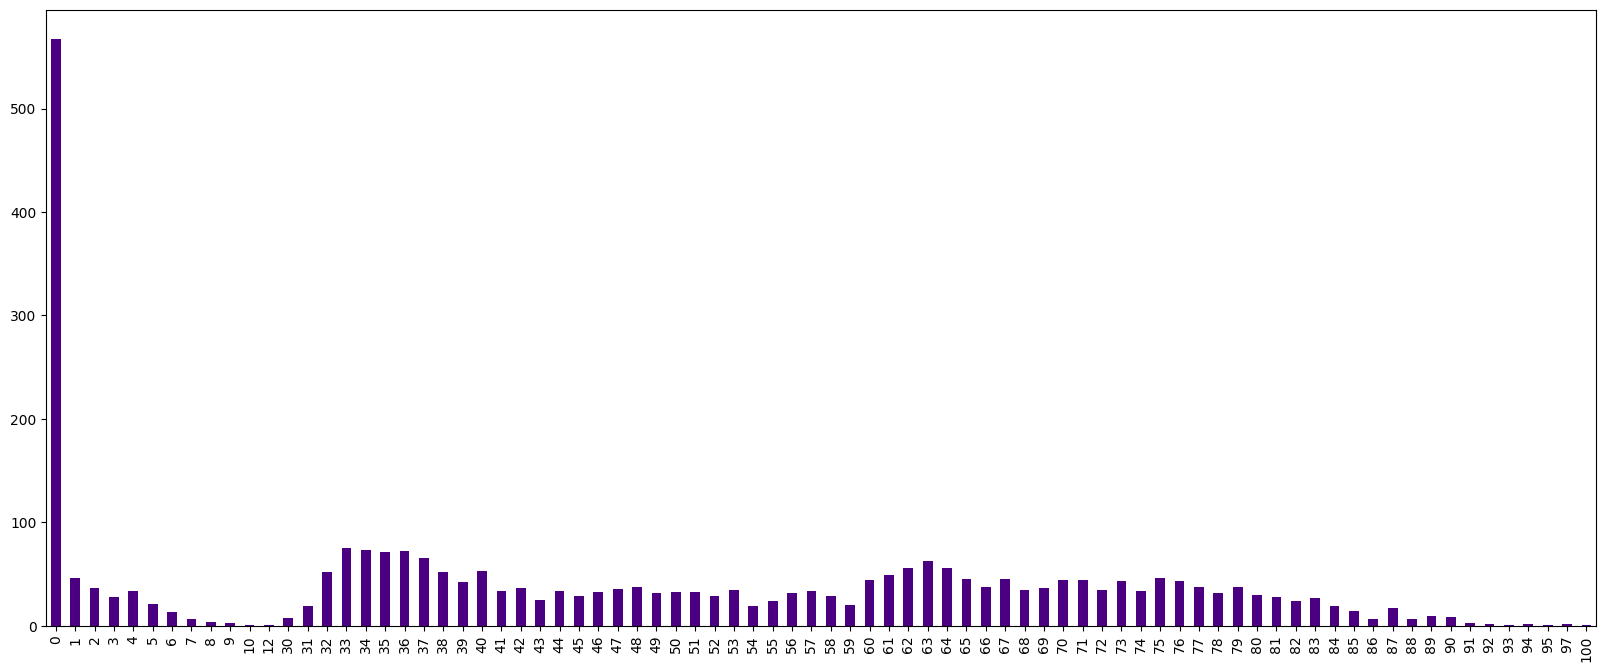

In [136]:
songs_df['popularity'].value_counts().sort_index(ascending=True) \
                    .plot.bar(figsize=(20, 8), color='indigo');

Song's popularity score at 0 has the most songs (over 500 songs). Meanwhile, most of the songs are scored in range from 31 to 85 has around 50-100 songs each score label.

On the other hand, there are only a few songs that has popularity over 90 and 100 at most. Therefore, the current music industry status is balance.

##### Question 5: Visualize the number of artists involved in 1 song in pie chart to explore insights

We would like to know in the dataset, how much percentage that a song is released by only 1 original artist or collaborated by many artists.

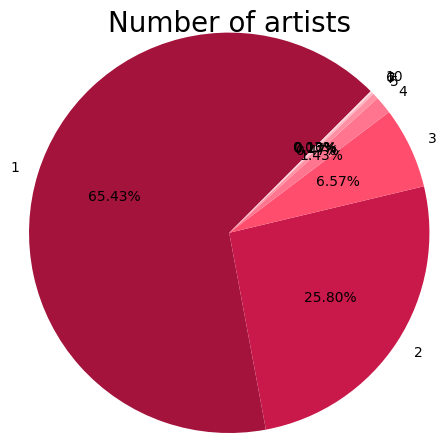

In [122]:
plt.figure(figsize=(8, 5))
plt.title('Number of artists', fontsize=20)
plt.pie(songs_df['artists_count'].value_counts(), 
        labels=songs_df['artists_count'].value_counts().keys(),
        textprops={"fontsize":10},
        radius=1.3, startangle=45,
        colors=['#a4133c', '#c9184a', '#ff4d6d', '#ff758f', '#ff8fa3', '#ffb3c1', '#ffccd5', '#fff0f3'],
        autopct='%.02f%%')
plt.show()

From the pie chart above, we can clearly see that songs that produced by only 1 original artist has 65.43%, and the rest 34.57% songs has 2 or more artists collaborated. 

This means the music industry is still dominant by original songs from an artist, but we can deny that recently artists are tend to collaborate with 25.8% songs have 2 artists involved and 6.57% songs that have 3 artists involved.

##### Question 6: Explore the histogram of all numerical columns in the DataFrame and collect insights

Finally, we would to take an overall look in all of the columns in the dataset using histogram chart to figure out how data is distributed according to each column.

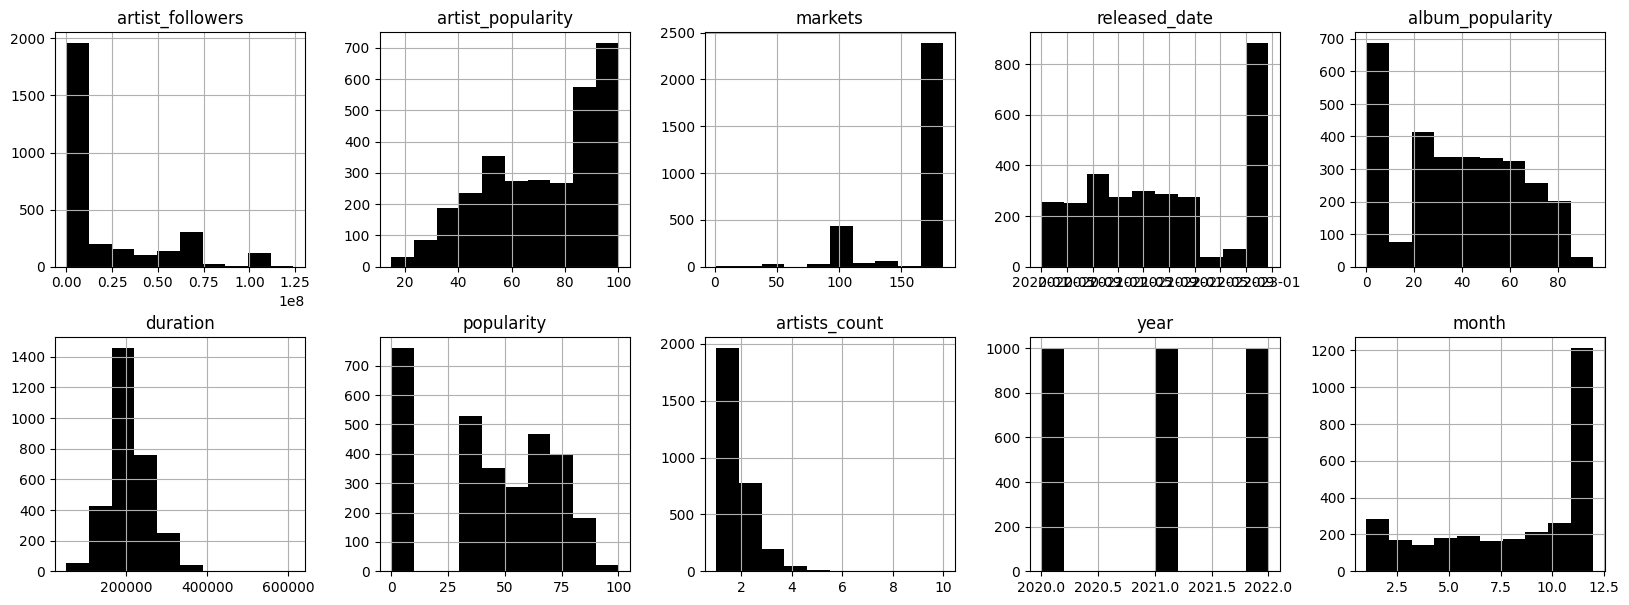

In [56]:
songs_df.hist(layout=(2, 5), figsize=(20, 7), color='black');

- artist_followers: left deviation, since there are some outliers that has a massive value.
- artist_popularity: right deviation, most of the artists has a very good popularity, from 40-100 popularity score.
- markets: right deviation, most of the songs are available worldwide (>= 180 countries).
- released_date: left deviation, right outlier, since in 2020 and 2021 songs are released with the same amount except for the end of 2022 it has a significant amount of songs.
- album_popularity: left deviation, most songs round up in the midrange, from 20 to 80 popularity score.
- duration: left deviation, most songs round up at 200000 ms duration.
- popularity: has the same trend as album popularity
- artists_count: left deviation, as there are 65% of songs that has only 1 artist involved.
- year: perfectly balanced, each year has a precise 1000 songs.
- month: has the same trend as released date, songs has exploding amounts in December of 2022, making December has the most songs in a month.

### <b><u>Step 7</u>: Generate DataFrame used for model training</b>

At this step, we would like to create a DataFrame with only usable numerical columns that will be used for data modeling, predicting a song's popularity based on its features specifically.

The chosen columns are: 
- Feature columns:
    - `aritst_followers`
    - `artist_popularity`
    - `markets`
    - `album_popularity`
    - `duration`
    - `artists_count`
- Label columns:
    - `popularity`

In [146]:
songs_model_df = songs_df[['artist_followers', 'artist_popularity', 'markets', 'album_popularity', 'duration', 'artists_count', 'popularity']]
songs_model_df.head()

,artist_followers,artist_popularity,markets,album_popularity,duration,artists_count,popularity
0,58961886,100,183,81,201391,3,92
1,100162,77,182,60,197333,2,62
2,39690,56,182,52,281493,1,62
3,359817,54,183,50,256663,1,62
4,12005881,81,183,85,273499,1,88


For the next step, let's calculate the correlation of the model DataFrame and predict which features are affected most to each other.

In [145]:
songs_model_df.corr(method='spearman')

,artist_followers,artist_popularity,markets,album_popularity,duration,artists_count,popularity
artist_followers,1.000000,0.838066,-0.551813,-0.154667,-0.083046,-0.038525,-0.190041
artist_popularity,0.838066,1.000000,-0.490837,-0.065923,-0.207180,0.303502,-0.077646
markets,-0.551813,-0.490837,1.000000,0.422590,0.075402,0.079161,0.435947
album_popularity,-0.154667,-0.065923,0.422590,1.000000,-0.137885,-0.046498,0.974226
duration,-0.083046,-0.207180,0.075402,-0.137885,1.000000,-0.054042,-0.162949
artists_count,-0.038525,0.303502,0.079161,-0.046498,-0.054042,1.000000,-0.028571
popularity,-0.190041,-0.077646,0.435947,0.974226,-0.162949,-0.028571,1.000000


From the correlation between columns, we could see that there is a high chance that artist_popularity and artist_followers are affected to each other since the correlation between this 2 columns is ~0,84. Another pair that has great impact to each other is album_popularity and popularity, with correlation of ~0.97. 

A prediction from this is album_popularity column will be the best feature to predict a song's popularity while training model.

In [59]:
%store songs_df
%store songs_model_df

Stored 'songs_df' (DataFrame)
Stored 'songs_model_df' (DataFrame)
